# BIDS - Hypotension Prediction from Vital Signs - Part 2

Physiologic Time Series Data

History
- 11/28/2022 modified for 2022 BIDS CDA class
- 12/27/2023 updated for 2023 BIDS CDA class

Objectives
- Physiologic Time Series Data
   - Sources
   - Meaning
   - Numerics vs Waveforms
   
References
 - Yoon Critical Care 2020;24:661
 - Lee Biomedical Engineering Online 2010;9:62

In [ ]:
import requests
def sub_ans(team,question_num,answer):
    url='https://bids-class.azurewebsites.net/submit-answer'
    data={'class':'cda',
         'module':12,
         'team':team,
         'question_num':question_num,
         'answer_num':answer}
    x=requests.post(url,data=data)
    if x.status_code==200:
        return True
    else:
        return False
    
# work around, old versions of python missing new string method in python 3.9
def removesuffix(string, suffix):
    assert string.endswith(suffix)
    return string[:-len(suffix)]
assert removesuffix("foo.hea", ".hea") == "foo"

In [ ]:
team_name = 'blank'

In [ ]:
def ELLIPSIS(x): return x

In [ ]:
from datetime import date, datetime, timedelta
from dateutil import parser

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

pd.options.display.width = 200
pd.options.display.max_colwidth = 100
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 150

***

### Load Physiologic Time Series Data

We're using data from the MIMIC-III Waveform Database Matched Subset.

https://physionet.org/content/mimic3wdb-matched/1.0/

It contains:
- waveforms: continuously sampled signals at 60-250 Hz, such as EKG
- numerics: numeric values computed from waveforms at 0.16-1 Hz, such as HR computed from an EKG.

MIT/PhysioNet defines a format and provides a library for working with these signals.  Before importing it, use pip to install it:

In [ ]:
#Already# !conda install -y wfdb

Now import wfdb

In [ ]:
import wfdb

Now, pull down some data files

In [ ]:
num_data = [
    'p00/p000020/3544749n.dat',

    'p00/p000079/3842928n.dat',
    'p00/p000079/3887555n.dat',

    'p00/p000109/3002540n.dat',
    'p00/p000123/3348632n.dat',
    'p00/p000123/3485814n.dat',

    'p00/p000124/3255538n.dat',
    'p00/p000124/3526846n.dat',
    'p00/p000124/3644535n.dat',
    'p00/p000124/3776642n.dat',
    'p00/p000124/3807277n.dat',
    'p00/p000124/3931528n.dat',
    'p00/p000124/3972293n.dat',
    'p00/p000124/3991520n.dat',
]

num_hdrs = [
    'p00/p000020/p000020-2183-04-28-17-47n.hea',
    'p00/p000079/p000079-2175-09-26-01-25n.hea',
    'p00/p000079/p000079-2175-09-26-12-28n.hea',
    'p00/p000123/p000123-2161-10-29-03-01n.hea',
    #'p00/p000123/p000123-2161-10-30-12-58n.hea',
    'p00/p000124/p000124-2160-07-05-18-27n.hea',
    'p00/p000124/p000124-2160-07-05-21-51n.hea',
    'p00/p000124/p000124-2160-07-06-15-23n.hea',
    #'p00/p000124/p000124-2160-07-11-12-21n.hea',
    #'p00/p000124/p000124-2160-07-14-01-20n.hea',
    #'p00/p000124/p000124-2166-01-09-13-03n.hea',
    #'p00/p000124/p000124-2166-01-11-23-28n.hea',
    #'p00/p000124/p000124-2166-01-23-10-43n.hea',
]
    
wave_data = [
    'p00/p000020/3544749_0001.dat',
    'p00/p000020/3544749_0001.hea',
    'p00/p000020/3544749_0002.dat',
    'p00/p000020/3544749_0002.hea',
    'p00/p000020/3544749_0003.dat',
    'p00/p000020/3544749_0003.hea',
    'p00/p000020/3544749_0004.dat',
    'p00/p000020/3544749_0004.hea',
    'p00/p000020/3544749_0005.dat',
    'p00/p000020/3544749_0005.hea',
    'p00/p000020/3544749_0006.dat',
    'p00/p000020/3544749_0006.hea',
    'p00/p000020/3544749_0007.dat',
    'p00/p000020/3544749_0007.hea',
    'p00/p000020/3544749_0008.dat',
    'p00/p000020/3544749_0008.hea',
    'p00/p000020/3544749_layout.hea',
]
    
wave_hdrs = [
    'p00/p000020/p000020-2183-04-28-17-47.hea',
]
    
dl_dir = '.'

#
# Only have to download once.
#
# However, wfdb.dl_files is smart and only re-downloads if file is missing
# or has different size ...
#
if 0:
    wfdb.dl_files('mimic3wdb-matched', dl_dir, num_data)
    wfdb.dl_files('mimic3wdb-matched', dl_dir, num_hdrs)

    wfdb.dl_files('mimic3wdb-matched', dl_dir, wave_data)
    wfdb.dl_files('mimic3wdb-matched', dl_dir, wave_hdrs)

## Load Data

Load numeric data into memory

In [ ]:
num_recs = [wfdb.rdrecord(removesuffix(_, '.hea')) for _ in num_hdrs]

## Part 1

### Numerics

Get the first rec

In [ ]:
rec = num_recs[0]

What is `rec`?  (Hint, use the `?`)

```
rec?
```

In [ ]:
rec?

<hr>

##### Q1

How many signals are in this record?

In [ ]:
# Your answer
print(rec.n_sig)
print(rec.p_signal.shape)
print(rec.p_signal.shape[1])

In [ ]:
sub_ans(team_name,1, 15)

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Find number of signals
  </div>
</summary>

```python
#
# Approach #1: use n_sig
#
rec.n_sig

#
# Approach #2: query shape of signal array `p_signal`
#
rec.p_signal.shape

#
# Or more exactly, find the number of columns:
#
rec.p_signal.shape[1]

#
# Approach #3: length of signal names
#
len(rec.sig_name)
```
</details>

***

### Create a Pandas DataFrame

Load the first rec into a Pandas DataFrame named 
- `rec.p_signal` is a numpy array
- `rec.sig_name` defines the signal (aka column) names

We'll also limit to just the HR (EKG), Pulse (HR from Arterial line), RESP, and Arterial BP signals

In [ ]:
#
# Create a function to convert record into dataframe
#
def create_df_from_record(rec):
    """
    Create a pandas datafrom from a wfdb record
    
    Args
     - rec - wfdb record
     
    Returns a pandas dataframe with one column for each signal, 
      plus a 'dt' column with the datetime of each sample
    """
    df = pd.DataFrame(rec.p_signal, columns=rec.sig_name)
    
    #
    # Find timestamp at each sample:
    #   timestamp = base_date + (sample number / frequency)
    #
    if np.isclose(rec.fs, 1/60):
        # avoid floating-point rounding for q1m data
        delta = pd.Series(range(df.shape[0])) * 60
    else:
        delta = pd.Series(range(df.shape[0])) / rec.fs
        
    df['dt'] = rec.base_datetime + pd.to_timedelta(delta, unit='seconds')
    
    return df

In [ ]:
?create_df_from_record

In [ ]:
#
# create record of numerics
#
df_raw = create_df_from_record(rec)
df_raw = df_raw[['dt', 'HR', 'PULSE', 'RESP', 'ABPSys', 'ABPDias', 'ABPMean', 'SpO2']]

In [ ]:
df_raw.head()

<hr>

##### Q2

How many HR values are zero?

In [ ]:
# Your answer
(df_raw.HR == 0).sum()

In [ ]:
sub_ans(team_name,2, 0)

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Number of zero HR values
  </div>
</summary>

```python
(df_raw.HR == 0).sum()
```
</details>

<hr>

##### Q3

How many PULSE values are zero?

In [ ]:
# Your answer
(df_raw.PULSE == 0).sum()

In [ ]:
sub_ans(team_name,3,365)

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Number of zero PULSE values
  </div>
</summary>

```python
(df_raw.PULSE == 0).sum()
```
</details>

Why do you think they are different?

***

### Examine the Data

#### Univariate / Multivariate plots and statistics

Plot a histogram of the 'PULSE' and 'HR' variables

In [ ]:
df_raw.PULSE.hist(bins=20);

In [ ]:
df_raw.HR.hist(bins=20);

Plot a scatter plot of HR vs PULSE

In [ ]:
df_raw.plot.scatter('HR', 'PULSE');

In [ ]:
df_raw.plot.scatter('HR', 'PULSE', marker='.', s=16, alpha=0.2);

Why do you think they are not more linearly related?

##### Q4

Compute the standard correlation coefficient between `HR` and `PULSE` using `pd.corr`.  Round result to 2 decimal digits.

In [ ]:
# Your answer
df_raw[['HR', 'PULSE']].corr()

In [ ]:
sub_ans(team_name,4, 0.66)

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: `HR` vs `PULSE` correlation
  </div>
</summary>

```python
#
# create projection with just columns of intereste
#
df_raw[['HR', 'PULSE']].corr()
```
</details>

<hr>

#### Time-series plot

Let's create a function to plot the variables over time (we'll use this multiple times):

In [ ]:
def plot_df(df, mm=None, imm=None):
    """
    Plot numeric physiologic data
    
    Args:
     - df - dataframe with HR, PULSE, RESP, ABP{Sys,Dias,Mean}, and SpO2
            columns
     - imm - optional min/max of X axis (by index)
     - mm  - optionsl min/max of X axis (by time)
    """
    n = 4
    # create a figure with 4 subplots
    fig, ax = plt.subplots(n, 1)
    
    # set height to something reasonable
    fig.set_figheight(n*2.5)
    fig.set_figwidth(12)

    # Plot HR/PUlse in first
    ax[0].set_ylabel('HR')
    ax[0].plot(df.dt, df.HR, label='HR')
    ax[0].plot(df.dt, df.PULSE, label='Pulse')
    ax[0].legend()

    # RESP in second
    ax[1].set_ylabel('RESP')
    ax[1].plot(df.dt, df.RESP)

    # Artieral BP in third
    ax[2].set_ylabel('ABP')
    ax[2].plot(df.dt, df.ABPSys, label='Sys')
    ax[2].plot(df.dt, df.ABPDias, label='Dias')
    ax[2].plot(df.dt, df.ABPMean, label='mABP')
    ax[2].legend()
    
    # SpO2 in final
    ax[3].set_ylabel('SpO2')
    ax[3].plot(df.dt, df.SpO2)

    # if user doesn't specify the min/max value for the x-axis,
    # find the min/max across all subplots
    if imm is not None:
        assert mm is None, "Can't use both mm and imm opts"
        mm = [df.loc[imm[0], 'dt'], df.loc[imm[1], 'dt'] ]
    elif mm is None:
        mm = ax[0].get_xlim()

        for i in range(1, len(ax)):
            x0, x1 = ax[i].get_xlim()
            if x0 < mm[0]: mm[0] = x0
            if x1 > mm[1]: mm[1] = x1
            
    # sync all subplots
    for ent in ax:
        ent.set_xlim(*mm)
        
    # return the fig and ax in case we want to
    # embellish them further
    return fig, ax
        
plot_df(df_raw);

Does this change your idea why PULSE and HR have different numbers of zero values?

***

### Brief look at Waveforms

Load waveform records

In [ ]:
wave_recs = [wfdb.rdrecord(removesuffix(_, '.hea')) for _ in wave_hdrs]

Create dataframe (using `create_df_from_record`)

In [ ]:
wrec = wave_recs[0]
df_wave = create_df_from_record(wrec)

Examine some rows:

In [ ]:
df_wave.head()

Skip ahead to index 10000
- first rows are empty (np.nan)
- after that are some test patterns

In [ ]:
df_wave[10000:10005]

##### Q5

How many waveform signals are available?

In [ ]:
# Your answer

In [ ]:
sub_ans(team_name,5,4)

<hr>

Create a function to plot waveforms alongside some numerics

In [ ]:
def plot_both(dfn, dfw, sigs, mm=None):    
    """
    Plot numeric/waveform physiologic data
    
    Args:
     - df - dataframe with HR, PULSE, RESP, ABP{Sys,Dias,Mean}, and SpO2
            columns
     - sigs -  list of signal types to plot (choices include abp, ekg, hr)
     - mm  - optional min/max of X axis (by time)
    """
    assert mm is not None and len(mm) == 2
    
    if type(mm[0]) is str: mm[0] = parser.parse(mm[0])
    if type(mm[1]) is str: mm[1] = parser.parse(mm[1])
    
    n = len(sigs)
    fig, raw_ax = plt.subplots(n, 1)
    if n == 1: raw_ax = [raw_ax]
    
    # set height to something reasonable
    fig.set_figheight(n*2.5)
    fig.set_figwidth(12)
    
    ax = {sig: raw_ax[i] for i, sig in enumerate(sigs)}
    #ax = {}
    #for i, sig in enumerate(sigs):
    #    ax[sig] = raw_ax[i]
    
    #
    # limit plot data to near min/max window
    #  - for numeric, extend window by a minute on both side, since
    #    data only available every minute
    tdfn = dfn[(dfn.dt >= mm[0] - pd.Timedelta(seconds=120)) & 
               (dfn.dt <= mm[1] + pd.Timedelta(seconds=120))]
    tdfw = dfw[(dfw.dt >= mm[0]) & (dfw.dt <= mm[1])]
    
    if 'abp' in ax:
        ax['abp'].set_ylabel('ABP')
        ax['abp'].plot(tdfn.dt, tdfn.ABPSys,  drawstyle='steps-post', label='Sys')
        ax['abp'].plot(tdfn.dt, tdfn.ABPDias, drawstyle='steps-post', label='Dias')
        ax['abp'].plot(tdfn.dt, tdfn.ABPMean, drawstyle='steps-post', label='mABP')

        ax['abp'].plot(tdfw.dt, tdfw.ABP, label='ABP', alpha=0.3)

        ax['abp'].legend()
        
    if 'ekg' in ax:
        ax['ekg'].set_ylabel('EKG')
        ax['ekg'].plot(tdfw.dt, tdfw.II, label='II')
        #ax['ekg'].plot(tdfw.dt, tdfw.AVF, label='AVF')

        ax['ekg'].legend()

    if 'hr' in ax:
        ax['hr'].set_ylabel('HR')
        ax['hr'].plot(tdfn.dt, tdfn.HR, drawstyle='steps-post', label='HR', )
        #ax['hr'].plot(tdfn.dt, tdfn.PULSE, drawstyle='steps-post', label='PULSE')
        ax['hr'].legend()

    if mm is not None:
        for axi in ax.values():
            axi.set_xlim(*mm)
        
    # return the fig and ax in case we want to
    # embellish them further
    return fig, ax

#### Full Minute

Blood pressure variation with respiratory pattern.

Illustrates the different levels of information available between q1m data and 125 Hz data.

Also see that EKG is affected (however this could be related to motion of the sensors relative to the heart and not intrinsic to the cardiac elecrical activity)

In [ ]:
plot_both(df_raw, df_wave, sigs=['ekg', 'abp'],
         mm = ['2183-04-28 17:49:00',
               '2183-04-28 17:50:00']);

#### Zoom out - plot 15 minutes

Notice how the numeric values of BP (Sys, Dias, mABP) correspond to the waveform

In [ ]:
plot_both(df_raw, df_wave, sigs=['ekg', 'abp'],
         mm = ['2183-04-28 17:49:00',
               '2183-04-28 18:04:00']);

#### Zoom in - plot 10 seconds

Finer view of EKG shows pacing spikes.  This is why heart rate is so constant during first few days.

One spike occurred on top of intrinsic atrial contraction, leading to ineffective ventricular contraction.

Illustrates challenge with the meaning of "HR".

In [ ]:
plot_both(df_raw, df_wave, sigs = ['ekg', 'abp'],
         mm = ['2183-04-28 17:49:20',
               '2183-04-28 17:49:30']);

#### 10 seconds later in record (after pacing stopped)

In [ ]:
plot_both(df_raw, df_wave, sigs=['ekg', 'hr'],
         mm = ['2183-04-29 12:01:20',
               '2183-04-29 12:01:30']);

#### Plot 30 minutes of EKG waveform & HR numerics (after pacing stopped)

In [ ]:
plot_both(df_raw, df_wave, sigs=['ekg', 'hr'],
         mm = ['2183-04-29 12:00:00',
               '2183-04-29 12:30:00']);

### Data Preprocessing -- Outlier Removal

Physiologic time series data are typically recorded automatically from the patient, with either minimal or no human review of values.  This has the benefit of reducing *bias* -- the vitals are continuously sampled regardless of the patient's status, in comparison to other measures such nurse documented vitals which may be sampled more/less frequently based on perceived patient acuity, or laboratory values that may only be sampled when there is clinical suspicion of abnormality.

This also has the downside that artefacts, such as a disconnected sensor or an external event that impedes the sensor, are left within the record.

**Outlier removal** is the process of removing these artifacts.  Typically there are 2-3 components:
- removal of physiologically implausible values, e.g. HR of a 1000, a blood pressure where the mean value is higher than the systolic value, etc.
- removal of statistically improbable values, e.g. HR's greater than 2-3 standard deviations from the mean, where the mean could be for the study population.
  - for a normally distributed variable (is your variable normally distributed?): values greater than 2-3 standard deviations from the mean
  - for other distributions, consider quantiles: < 0.5% or > 99.5%
- noise filter, such as a median filter

However, sometimes physiology of interest is improbable:
- During cardiac arrest, HR will be zero (measured from pulse)

#### Physiologic Outliers

**Exercise:** create a function named `remove_outliers` that:

- Takes a dataframe with numeric PTSD (such as `df_raw`)

- Applies the following physiologic plausible ranges used by Yoon *et al*:

    - HR 10-400 (use for Pulse too)
    - RR 1-100
    - BP 10-400
       - apply to each component: systolic, diastolic, mean
       - check that systolic >= mean >= diastolic
       - if any component is invalid => assume all invalid
    - SpO2 10-100 (*)

- Replaces outliers with `np.nan`.

- Print the number of HR, Pulse, and RESP values that are invalid.

In [ ]:
def remove_outliers(df):
    # create masks:
    m_invalid_hr    = (df.HR < 10) | (df.HR > 220)
    m_invalid_pulse = (df.PULSE < 10) | (df.PULSE > 220)
    m_invalid_resp  = (df.RESP  < 1)  | (df.RESP  > 60)
    m_invalid_abp   = ((df.ABPSys < 10)  | (df.ABPSys > 250) |
                       (df.ABPDias < 10) | (df.ABPDias > 250) |
                       (df.ABPMean < 10)  | (df.ABPMean > 250) |
                       (df.ABPMean > df.ABPSys) | (df.ABPMean < df.ABPDias))
    m_invalid_spo2  = (df.SpO2 < 10) | (df.SpO2 > 100)
    

    # set outliers to np.nan
    df.loc[m_invalid_hr, 'HR'] = np.nan
    df.loc[m_invalid_pulse, 'PULSE'] = np.nan

    df.loc[m_invalid_resp, 'RESP']   = np.nan

    df.loc[m_invalid_abp, 'ABPSys']  = np.nan
    df.loc[m_invalid_abp, 'ABPDias'] = np.nan
    df.loc[m_invalid_abp, 'ABPMean'] = np.nan

    df.loc[m_invalid_spo2, 'SpO2'] = np.nan
    
    # Print how many values are invalid
    print(f'num invalid HR    {np.sum(m_invalid_hr)}')
    print(f'num invalid Pulse {np.sum(m_invalid_pulse)}')
    print(f'num invalid Resp  {np.sum(m_invalid_resp)}')
    print(f'num invalid ABP   {np.sum(m_invalid_abp)}')
    print(f'num invalid SpO2  {np.sum(m_invalid_spo2)}')

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Outlier removal: physiologically implausible values
  </div>
</summary>

```python
def remove_outliers(df):
    # create masks:
    m_invalid_hr    = (df.HR < 10) | (df.HR > 220)
    m_invalid_pulse = (df.PULSE < 10) | (df.PULSE > 220)
    m_invalid_resp  = (df.RESP  < 1)  | (df.RESP  > 60)
    m_invalid_abp   = ((df.ABPSys < 10)  | (df.ABPSys > 250) |
                       (df.ABPDias < 10) | (df.ABPDias > 250) |
                       (df.ABPMean < 10)  | (df.ABPMean > 250) |
                       (df.ABPMean > df.ABPSys) | (df.ABPMean < df.ABPDias))
    m_invalid_spo2  = (df.SpO2 < 10) | (df.SpO2 > 100)
    

    # set outliers to np.nan
    df.loc[m_invalid_hr, 'HR'] = np.nan
    df.loc[m_invalid_pulse, 'PULSE'] = np.nan

    df.loc[m_invalid_resp, 'RESP']   = np.nan

    df.loc[m_invalid_abp, 'ABPSys']  = np.nan
    df.loc[m_invalid_abp, 'ABPDias'] = np.nan
    df.loc[m_invalid_abp, 'ABPMean'] = np.nan

    df.loc[m_invalid_spo2, 'SpO2'] = np.nan
    
    # Print how many values are invalid
    print(f'num invalid HR    {np.sum(m_invalid_hr)}')
    print(f'num invalid Pulse {np.sum(m_invalid_pulse)}')
    print(f'num invalid Resp  {np.sum(m_invalid_resp)}')
    print(f'num invalid ABP   {np.sum(m_invalid_abp)}')
    print(f'num invalid SpO2  {np.sum(m_invalid_spo2)}')
```
</details>

Apply the function to our data:

(note: we'll make a copy of the dataframe first, so that we can run it multiple times)

In [ ]:
df_clean_1 = df_raw.copy()
remove_outliers(df_clean_1)

<hr>

##### Q6

How many ABP values were invalid?

In [ ]:
sub_ans(team_name,6, 384)

Plot the cleaned data:

In [ ]:
plot_df(df_clean_1);

***

#### Statistical Outlier Rejection

After implausible/impossible values are removed, it is common to remove statistical outliers
- either based on population distribution,
- or local distribution for the patient.

**Exercise:** write a function `remove_outliers_stat` that
- takes arguments
   - numeric dataframe
   - threshold value such that outlier with quantile < threshold or > threshold are removed
- computes cutoff values `minv` and `maxv` from threshold using `pd.Series.quantile`
  ([docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html))
- sets values outside cutoffs to `np.nan`
- prints the number of outliers removed

In [ ]:
def remove_outliers_stat(df, thresh):
    for col in df.columns:
        if col == 'dt': continue
        ### Solution start
        minv, maxv = df[col].quantile([thresh, 1-thresh])
        m = (df[col] < minv) | (df[col] > maxv)
        df.loc[m, col] = np.nan
        print(f' - {col}: {m.sum()} outliers removed')

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Outlier removal: statiscially implausible values
  </div>
</summary>

```python
def remove_outliers_stat(df, thresh):
    for col in df.columns:
        if col == 'dt': continue
        minv, maxv = df[col].quantile([thresh, 1-thresh])
        m = (df[col] < minv) | (df[col] > maxv)
        df.loc[m, col] = np.nan
        print(f' - {col}: {m.sum()} outliers removed')
```
</details>

Process our data ith thresh = 0.001

In [ ]:
df_clean_2 = df_clean_1.copy()
remove_outliers_stat(df_clean_2, 0.001)

##### Q7

How many ABP statistical outliers were removed (for ABPSys)?

In [ ]:
sub_ans(team_name,7,2)

***

### Missing Value Imputation

Machine learning algorithms typically assume features are available at the time of prediction.  It is necessary to impute missing values, both missing in the original dataset, and missing because of outlier removal.

Missing value imputation can range from simple to complex
- population mean value imputation
- last value carried foward (aka foward fill)
- summary of recent values carried forward (eg forward fill local mean)
- missingness as a feature (impute + missing flag)
- linear regression (be careful to avoid non-causality)
- multiple imputation (create set of imputations statistically similar to real values)
- fit non-mising data gaussian processes (exploit correlation across variables and time)

Resampling and downsampling can affect missing value imputation.
- Background
  - longer time series can provide more information
  - however, more values requires larger models (with more parameters) and larger training sets
  - tradeoff: use statistical summaries of time series
     - mean, standard deviation, min, max, etc
     - break into regions (remote, recent, etc)
- Statistical summaries essentially downsample time-series
  - Eg Average 60 minutes of q1m HR
  - Approach: ignore missing values
  - Summaries somewhat resilient to small missingingness

Apply Yoon *et al*'s imputation strategy:
- impute missing value with moving average of previous 3 values
- IF missing data time period < 10 min.

**Excercise:** use pandas rolling window calculations (`rolling()`) to compute rolling average.

In [ ]:
pd.DataFrame.rolling?

Start by computing rolling average of synthetic vector of last three samples 

In [ ]:
def create_tmp():
    tmp = pd.DataFrame(np.zeros(shape=(20,1), dtype=float), columns=['signal'])
    tmp.loc[0, 'signal'] = 5
    tmp.loc[3:4, 'signal'] = np.nan # Small gap (***) notice that pandas ranges are different than standard python
    tmp.loc[6, 'signal'] = 2
    tmp.loc[8:17, 'signal'] = np.nan # big gap
    return tmp

tmp = create_tmp()

# (***) Notice that pandas slices are different than standard python

Create a `valid` column: 'True' when signal is not missing

In [ ]:
tmp['valid'] = ELLIPSIS(tmp.signal.notnull())

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: label valid time samples
  </div>
</summary>

```python
tmp['valid'] = tmp.signal.notnull()
```
</details>

<hr>

##### Q7

How many valid values are there?

In [ ]:
# your solution here
ELLIPSIS(tmp.valid.sum())

In [ ]:
sub_ans(team_name,7,8)

<hr>

Compute rolling average of last three minutes (*) (window size = 3):

(*) computing average of previous 3 non-missing values is a little harder

Hint, look at `pd.Series.rolling`

In [ ]:
tmp['avg3']  = ELLIPSIS(tmp.signal.rolling(3).mean())

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: rolling average of 3 previous values
  </div>
</summary>

```python
tmp['avg3']  = tmp.signal.rolling(3).mean()
```
</details>

Fill forward with `fillna()`

In [ ]:
tmp['avg3_ffill'] = ELLIPSIS(tmp.avg3.fillna(method='ffill'))

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: Forward fill
  </div>
</summary>

```python
tmp['avg3_ffill'] = tmp.avg3.fillna(method='ffill')
```
</details>

- Label start/stop of missing values runs with `run_ss`
  <br>(hint look at pandas [shift](https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html) )
- cumsum start/stop to label `group`s (noting that groups will alternate between valid and invalid)
  <br>(hint look at pandas [cumsum](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html) )

In [ ]:
tmp['run_ss'] = ELLIPSIS(tmp.valid != tmp.valid.shift())
tmp['group']  = ELLIPSIS(tmp.run_ss.cumsum())

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: label satart stop, define groups
  </div>
</summary>

```python
tmp['run_ss'] = tmp.valid != tmp.valid.shift()
tmp['group']  = tmp.run_ss.cumsum()
```
</details>

Examine intermediate result

In [ ]:
tmp.transpose()

Count the size of each group, set mask_10 if group_size less than 10.

Hints:
- consider [groupyby](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) on group to get size
- then [map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) group to group size

In [ ]:
# solution here
tmp['group_size'] = ELLIPSIS(tmp.group.map(tmp.valid.groupby(tmp.group).count()))
tmp['mask_10']    = ELLIPSIS(tmp.group_size < 10)

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: group size
  </div>
</summary>

```python
tmp['group_size'] = tmp.group.map(tmp.valid.groupby(tmp.group).count())
tmp['mask_10']    = tmp.group_size < 10
```
</details>

<hr>

##### Q8

What is the largest group size?

In [ ]:
# solution here
ELLIPSIS(tmp.group_size.max())

In [ ]:
sub_ans(team_name, 8, 10)

<hr>

In [ ]:
#
# What is `tmp.group.map(tmp.valid.groupby(tmp.group).count())` ?
#
# Break it down:
# OUTER: tmp.group.map(INNER)
# INNER: [tmp.valid].groupby([tmp.group]).count()
#        [series]   .groupby([series])   .count()
#   => Series.Groupby
#
#   First series (tmp.valid) is grouped by second series (tmp.group) and count function
#   is applied.
#
#   Here this returns a series where index = group and value equals group size.
#   (note we could pick any column for tmp.valid ... count() only cares about size).
#
# OUTER: tmp.group.map(INNER)
#   Transform group into group size.

#### Aside: Alternate formulations

In [ ]:
# Alternate #1: use SeriesGroupby.transform with lambda
#
#   tmp['group_size'] = tmp.groupby('group')['run_ss'].transform(lambda _: _.shape[0]) 
#
# (*) SeriesGroupby.transform returns a series with the same indices.
#   - The function must either return a series of the same shape, or
#     a value that can broadcast to the group.
#   - We take the shape of `run_ss`, but any column would work.
#

In [ ]:
# Alternate #2: use DataFrameGroupby.transfrom with count
#
#   tmp['group_size'] =  tmp.groupby('group')['run_ss'].transform('count')
#

Which is faster? ... Benchmark it!

In [ ]:
#
# Setup: create a long signal
#tmp_signal = []
#for r in num_recs:
#    tmp_signal.extend

tmp1 = pd.DataFrame({'signal': np.concatenate([_.p_signal[:, 0] for _ in num_recs], axis=0)})
print(f'tmp1 shape: {tmp1.shape}')
tmp1['valid'] = tmp1.signal.notnull()
tmp1['run_ss'] = tmp1.valid != tmp1.valid.shift()
tmp1['group']  = tmp1.run_ss.cumsum()
tmp1['group_size'] = 0

Our code:

In [ ]:
%%timeit
tmp1['group_size'] = tmp1.group.map(tmp1.valid.groupby(tmp1.group).count())

Alternate #1

In [ ]:
%%timeit
tmp1['group_size'] = tmp1.groupby('group')['run_ss'].transform(lambda _: _.shape[0])

Alternate #2

In [ ]:
%%timeit
tmp1['group_size'] = tmp1.groupby('group')['run_ss'].transform('count')

A snazzy way to benchmark the `perfplot` package

In [ ]:
if 0:
    import perfplot
    np.random.seed(0)
    df_ = pd.DataFrame(np.random.randn(5, 1000))

    perfplot.show(
        setup=lambda n: pd.concat([tmp1] * n, ignore_index=True),
        kernels=[
            lambda df:  df.group.map(df.valid.groupby(df.group).count()),
            lambda df:  df.groupby('group')['run_ss'].transform(lambda _: _.shape[0]),
            lambda df:  df.groupby('group')['run_ss'].transform('count')
        ],
        labels=['map(group)', 'groupby-lambda', 'groupby-count'],
        n_range=[2**k for k in range(0, 10)],
        xlabel='N (* len(df))',
        logx=True,
        logy=True)
    plt.style.use('default')

#### Back to Imputation

Create a mask that is true when a value is missing (~valid) and can be imputed (group_size < 10)

In [ ]:
tmp['mask_impute'] =  ELLIPSIS(~tmp.valid & (tmp.group_size < 10))

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: determine mask_impute
  </div>
</summary>

```python
tmp['mask_impute'] = ~tmp.valid & (tmp.group_size < 10)
```
</details>

<hr>

##### Q9

How many values are imputed

In [ ]:
# Your code here
ELLIPSIS(tmp.mask_impute.sum())

In [ ]:
sub_ans(team_name, 9, 2)

<hr>

Set `new_signal` to imputed value when `mask_impute` True:

In [ ]:
tmp['new_signal'] = tmp.signal
tmp.loc[tmp.mask_impute, 'new_signal'] = tmp.loc[tmp.mask_impute, 'avg3_ffill']

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: apply imputation to create new_signal
  </div>
</summary>

```python
tmp['new_signal'] = tmp.signal
tmp.loc[tmp.mask_impute, 'new_signal'] = tmp.loc[tmp.mask_impute, 'avg3_ffill']
```
</details>

Have a look everything:

In [ ]:
tmp.transpose()

Finally, create a function `impute` that does all this to impute a column in-place.

We will call this for each columna from `impute_all` function (given).

(Hint: use pandas series as variables to avoid putting temporary values into the main dataframe)

In [ ]:
def impute(signal):
    """
    Args:
     - signal -- series to perform imputation on
    """
    valid        = signal.notnull()
    avg3         = signal.rolling(3).mean()
    avg3_ffill   = avg3.fillna(method='ffill')
    run_ss       = valid != valid.shift()
    group        = run_ss.cumsum()
    group_size   = group.map(valid.groupby(group).count())
    m_impute     = ~valid & (group_size < 10)
    
    result = np.where(m_impute, avg3_ffill, signal)
    print(f'impute {m_impute.sum()}')
    return result

def impute_all(df):
    for var in df.columns:
        if var == 'dt': continue
        print(f'{var}: ', end='')
        df[var] = impute(df[var])

<details>

<summary>
  <div class="alert alert-block alert-info">
    Solution: impute function
  </div>
</summary>

```python
def impute(signal):
    """
    Args:
     - signal -- series to perform imputation on
    """
    valid        = signal.notnull()
    avg3         = signal.rolling(3).mean()
    avg3_ffill   = avg3.fillna(method='ffill')
    run_ss       = valid != valid.shift()
    group        = run_ss.cumsum()
    group_size   = group.map(valid.groupby(group).count())
    m_impute     = ~valid & (group_size < 10)
    signal[m_impute] = avg3_ffill[m_impute]
    print(f'impute {m_impute.sum()}')
```
</details>

Check `impute` on a fresh temp dataframe:

In [ ]:
tmp = create_tmp()
tmp['imputed'] = impute(tmp['signal'])
tmp.transpose()

Use `impute_all` on our signals:

In [ ]:
df_impute = df_clean_2.copy()
impute_all(df_impute)

<hr>

##### Q10

How many ABPSys values were imputed?

In [ ]:
sub_ans(team_name,10,24)

<hr>

### Identify Hypotension Events

To perform supervised learning, we need to label the outcome for training.

We'll use Yoon *et al*'s Hypotension (HoTN) definition:
 - SBP<90 and MAP<60 for >=5 min in 10 min interval
 - combine events within 2 minutes (*1)

Target labels
 - assign positive label in 15 minutes prior to event (*2)

Ambiguity:
 - (*1) does interval end at 10 minutes, or when BP normalizes?
 - (*2) this effetively merges HoTN events within 15 minutes

Exercise: create a function to label hypotension.

Strategy
- identify individual minutes of hypotension
- rolling sum over last 10

In [ ]:
def label_hotn(df):
    # identify individual minutes of hypotension:
    hotn = ... # your code here
    
    # compute a rolling sum over 10 minutes:
    hotn_sum = hotn.rolling(10).sum()
    
    # Shift left by 9 to "left" align the window:
    hotn_sum_left = hotn_sum.shift(-9)
    
    # label onset of hypotension:
    onset = pd.Series(np.where(hotn & (hotn_sum_left >= 5), 1, 0))
    
    # Find if this is a new onset (no prior onset in 15 minutes)
    last_onset = pd.Series(np.where(onset, df.index, np.nan))
    new_onset = (onset &
                 (((df.index - last_onset.shift(1)) > 15) |
                  last_onset.shift(1).isnull() )).astype(int)
    
    # Label hypotension training target for machine learning
    #  - 15 minutes upto (and including) onset
    hotn_target = new_onset.rolling(15).max().shift(-15)
    
    # save for plotting:
    df['hotn']        = hotn
    df['onset']       = onset
    df['new_onset']   = new_onset
    df['hotn_target'] = hotn_target

Apply to our data

In [ ]:
df_hotn = df_impute.copy()
label_hotn(df_hotn)

In [ ]:
df_hotn['last_hotn'] = np.nan
df_hotn['last_hotn'] = np.where(df_hotn['onset'], df_hotn.index, np.nan)
df_hotn['last_hotn'] = df_hotn['last_hotn'].fillna(method='ffill')
df_hotn['new_onset'] = (df_hotn['onset'] & (
    ((df_hotn.index - df_hotn.last_hotn.shift(1)) > 15) | df_hotn.last_hotn.shift(1).isnull()) ).astype(int)

<hr>

##### Q11

How many hypotension targets are there?

In [ ]:
# Your code here

In [ ]:
sub_ans(team_name,11, )

<hr>

Plot our data, add overlay for 
- hypotension minutes (orange)
- hypotension onset (red)
- hypotension targets for training (blue)

(we'll use the mm option to "zoom" in on the interesting portion)

In [ ]:
def plot_hotn(df, mm=None, imm=None):
    fig, ax = plot_df(df, mm=mm, imm=imm)

    for i in df_hotn.query('hotn_target == 1').index:
        ax[2].axvline(df.dt[df.index[i]], alpha=0.2, ymin = 0.6, ymax = 0.9, color='blue')
        
    onsets = df.query('onset == 1').dt
    ax[2].scatter(onsets, [50] * len(onsets), marker='x', color='red')
    
    new_onsets = df.query('new_onset == 1').dt
    ax[2].scatter(new_onsets, [60] * len(new_onsets), marker='^', color='red')

    for i in df.query('hotn == 1').dt:
        ax[2].axvline(i, alpha=0.4, color='orange', ymin=0.1, ymax=0.4)
        
plot_hotn(df_hotn, imm=[80,200])

#### Aside: Defining when an event starts

What if we used `onset` instead of `new_onset`

Using `new_onset`:
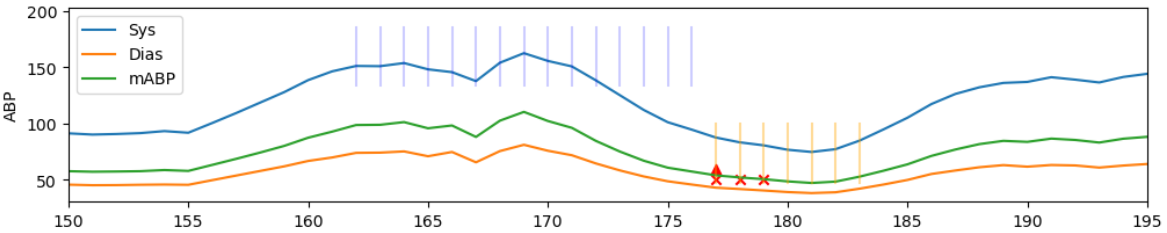

Using `onset`:
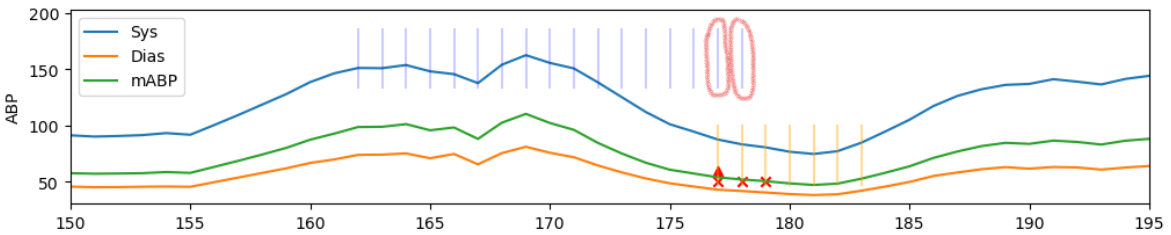

Minutes 177 and 178 are labeled as occuring prior to a HoTN event.

But, they also occur within 15 minutes of a prior event.

If we think about the patient state:
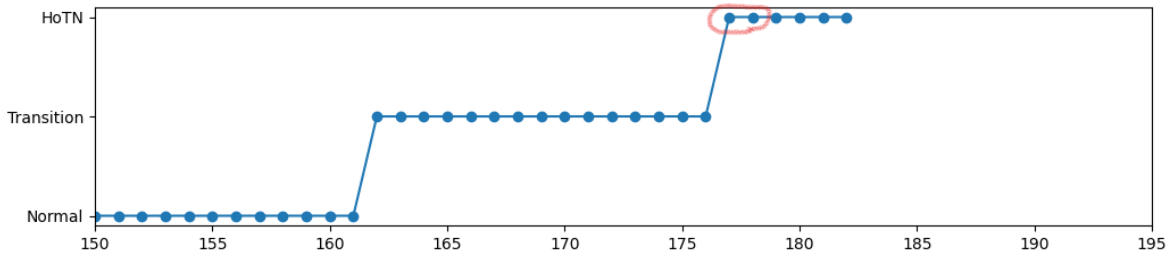

We're trying to detect patients in the transition state between normal physiology and hypotension physiology.

Including minutes of hypotensive state (minutes 177 and 178) along with minutes of transition state (162-176) *may* blur the signal present that is unique to the training state, *potentially* impairing the performance of models trained.

### Features

Now that outcome is defined, start building predictive features.

Features can categorized in different ways
- fixed vs dynamic
- categorical vs ordinal vs continuous
- regularly vs irregularly sampled
- ...

My worldview
- **outcome** is a function of **state**
- ***state** is the link between past and future* (Boyd, Linear Dynamic Systems)
   - state is a sufficient statistic (summary) of past events
   - state (+ actions) completely determines future (eg outcome)
- perfect representations of state and transition function are impossible

=> probability of outcome is a function of *estimated state* + error

Choose features to help estimate state.

Back to Yoon et al 2020.

Features
- stats: mean, median, variance, quartiles, min, max
- DFT - discrete fourier transform
- EMA - exponential moving average

Windows:
- 5, 10, 30, 60 minutes
- rolling every minute

***

**Exercise:** Define a function to compute windowed statistics

Arguments:
- dataframe (df)
- window size (win)
- list of statistics (f)

Processing:
- use rolling(win).agg(f)
- mess with column names

Returns:
- new dataframe with features

In [ ]:
def compute_stat_features(df_raw, win, f = None):
    if f is None:
        f = ['var', 'mean', 'median', 'min', 'max']
    
    t = df_raw.rolling(win).agg(f)
    
    # rename columns to {VITAL}_{STAT}_{WIN}
    fmt_str = '{0[0]}_{0[1]}_' + str(win)
    t.columns = t.columns.map(fmt_str.format)
    
    return t

Test on dataframe with window=60

In [ ]:
df_temp = df_hotn.copy()
df_temp_feature = compute_stat_features(df_temp, 60)

<hr>

##### Q12

What is the maximum value of `ABPSys_min_60`

In [ ]:
# your code here
....

In [ ]:
sub_ans(team_name,12,)

<hr>

Plot signal + min/max/mean

In [ ]:
(pd.concat([df_temp, df_temp_feature, pd.DataFrame(np.arange(len(df_temp)), columns=['t'])], axis=1)
   .plot(x='t', y=['ABPSys', 'ABPSys_min_60', 'ABPSys_max_60', 'ABPSys_mean_60'],
         figsize=(12,6)))

Define a similar function for exponentially weighted moving window:
(see pandas.ewm(), similar to pandas.rolling())

In [ ]:
def compute_ewm_features(df_raw, span, f = None):
    if f is None:
        f = ['mean']
    t = df_raw.ewm(span=span).agg(f)
    fmt_str = '{0[0]}_{0[1]}_' + str(span)
    t.columns = t.columns.map(fmt_str.format)
    t.columns = t.columns.map(lambda _: _.replace('_mean_', '_ewma_'))
    
    return t

Finally a function for DFT

In [ ]:
# Motivated https://stackoverflow.com/questions/46037217/apply-rolling-window-and-return-stacked-feature-vectors-as-dataframe
#
def rolling_windows(a, window):    
    if window > a.shape[0]:
        raise ValueError('Specified `window` length of {0} exceeds length of'
                         ' `a`, {1}.'.format(window, a.shape[0])) 
    if isinstance(a, (pd.Series, pd.DataFrame)):
        a = a.values
    if a.ndim == 1:
        a = a.reshape(-1, 1)
    shape = (a.shape[0] - window + 1, window) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    windows = np.squeeze(np.lib.stride_tricks.as_strided(a, shape=shape, 
                                                         strides=strides))
    # In cases where window == len(a), we actually want to "unsqueeze" to 2d.
    #     I.e., we still want a "windowed" structure with 1 window.
    if windows.ndim == 1:
        windows = np.atleast_2d(windows)
    return windows

def my_fft(s):
    return np.abs(np.fft.fft(s))[:int(len(s)/2)]

def compute_fft_features(df, win, cols):
    res = None
    ncoef = int(win/2)
    for col in cols:
        arr = np.apply_along_axis(my_fft, 1, rolling_windows(df[col], window=win))
        dft = pd.DataFrame(arr, index=df.index[win-1:])
        dft.columns = [f'{col}_dft_{_}' for _ in range(ncoef)]
            
        if res is None:
            res = dft
        else:
            res = pd.concat([res, dft], axis=1)
    return res

Now create all the features

In [ ]:
vars = ['HR', 'PULSE', 'RESP', 'ABPSys', 'ABPDias', 'ABPMean', 'SpO2']

In [ ]:
df_src = df_hotn[vars].copy()
df_f   = df_src.copy()

In [ ]:
#
# Skip for now:
#
if 0:
    df_f = pd.concat([df_f, compute_fft_features(df_src,   5, vars)], axis=1)
    df_f = pd.concat([df_f, compute_fft_features(df_src,  10, vars)], axis=1)
    df_f = pd.concat([df_f, compute_fft_features(df_src,  30, vars)], axis=1)
    df_f = pd.concat([df_f, compute_fft_features(df_src,  60, vars)], axis=1)

In [ ]:
df_f = pd.concat([df_f, compute_stat_features(df_src,  5)], axis=1)
df_f = pd.concat([df_f, compute_stat_features(df_src, 10)], axis=1)
df_f = pd.concat([df_f, compute_stat_features(df_src, 30)], axis=1)
df_f = pd.concat([df_f, compute_stat_features(df_src, 60)], axis=1)

In [ ]:
df_f = pd.concat([df_f, compute_ewm_features(df_src,  5)], axis=1)
df_f = pd.concat([df_f, compute_ewm_features(df_src, 10)], axis=1)
df_f = pd.concat([df_f, compute_ewm_features(df_src, 30)], axis=1)
df_f = pd.concat([df_f, compute_ewm_features(df_src, 60)], axis=1)

Compare the exponential moving average with the standard average:

In [ ]:
(pd.concat([df_f, pd.DataFrame(np.arange(len(df_f)), columns=['t'])], axis=1)
   .plot(x='t', y=['ABPSys', 
                   #'ABPSys_ewma_5',
                   'ABPSys_ewma_60', 'ABPSys_mean_60'
                  ],
         figsize=(12,6)))

***

### Next Steps

 - univariate analysis
 - multivariate analysis
 - feature correlation
 - feature importance
 - grouping (t-SNE)

For fun, let's plot the TSNE:

In [ ]:
df_tsne = df_f.copy()
df_tsne['hotn_target'] = df_hotn['hotn_target']

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
emb = TSNE(n_components=2).fit_transform(df_tsne.fillna(value=0))

x = emb[:, 0]
y = emb[:, 1]
c = np.where(df_tsne.hotn_target == 1, 'red', 'blue')

In [ ]:
plt.scatter(x, y, c=c, alpha=0.25)